<a href="https://colab.research.google.com/github/Arshiya109/python1/blob/main/MODULE_9_LAB_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Module 9: Neural Networks
## Lab 2: Using MLP for multiclass classification
#### Module Coordinator: Shantanu Agrawal




Till now, we got to know what is MLP, how it can be used for classification. We have done the single class classification in the previous lab session.

In this notebook we will try to use an MLP for multiclass classification on the iris dataset.

100%|██████████| 100/100 [00:00<00:00, 226.98it/s]


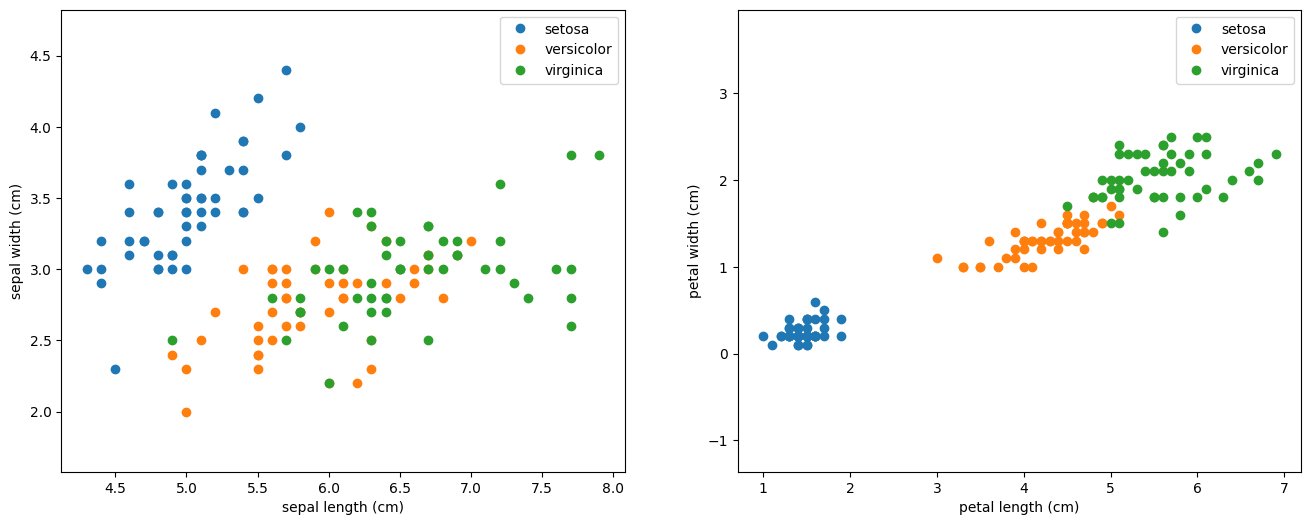

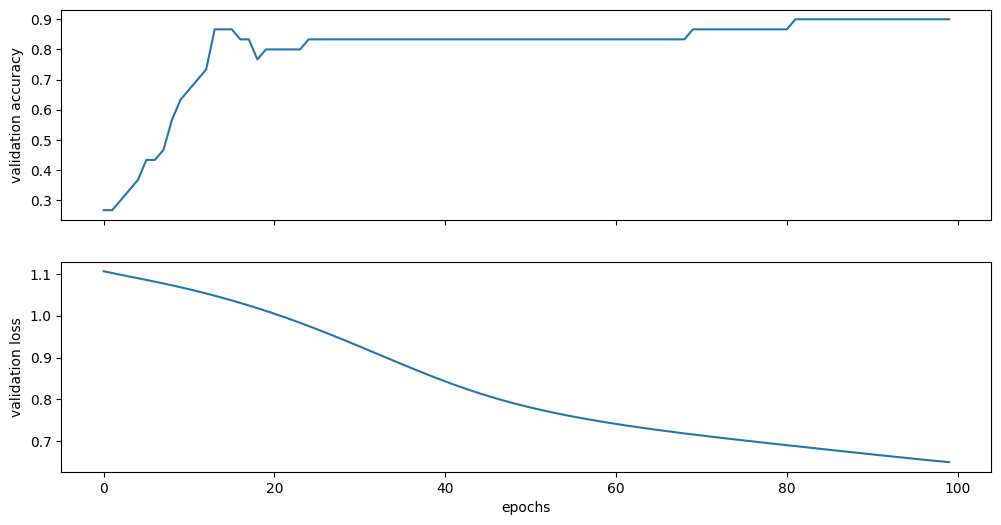

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1],
             linestyle='none',
             marker='o',
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3],
             linestyle='none',
             marker='o',
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();


import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train for 100 epochs
EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
X_test= torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");



# Experiment with the neural network architecture


1.   Try changing the number of hidden layers.
2.   Try changing the number of neurons in the hidden layer.
3.   Try using a different activation function.




Can you observe any changes?

100%|██████████| 100/100 [00:00<00:00, 472.98it/s]


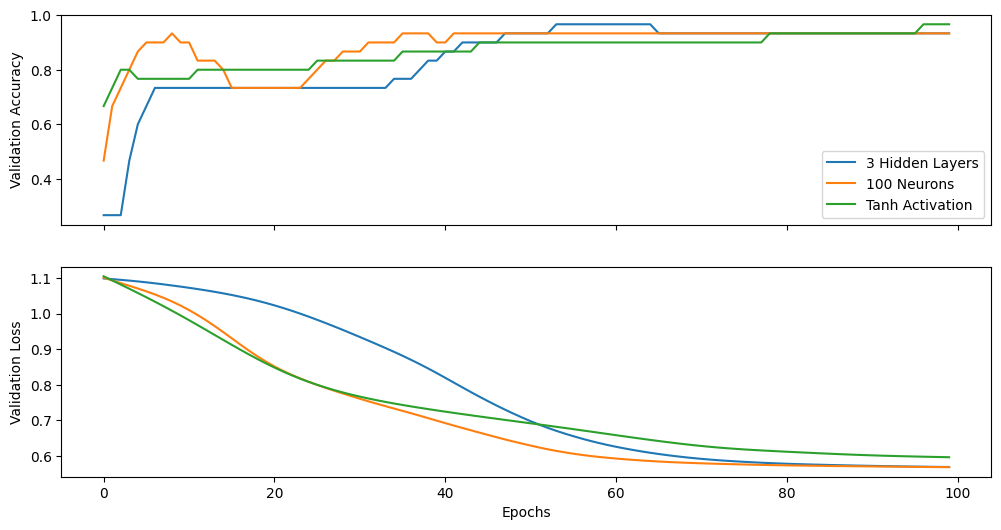

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim, hidden_layers=2, neurons=50, activation=F.relu):
        super(Model, self).__init__()
        self.hidden_layers = hidden_layers
        self.activation = activation
        self.input_layer = nn.Linear(input_dim, neurons)
        self.hidden = nn.ModuleList([nn.Linear(neurons, neurons) for _ in range(hidden_layers)])
        self.output_layer = nn.Linear(neurons, 3)

    def forward(self, x):
        x = self.activation(self.input_layer(x))
        for layer in self.hidden:
            x = self.activation(layer(x))
        x = F.softmax(self.output_layer(x), dim=1)
        return x

# Training function
def train_model(model, X_train, y_train, X_test, y_test, optimizer, loss_fn, epochs=100):
    loss_list = np.zeros((epochs,))
    accuracy_list = np.zeros((epochs,))

    X_train = torch.from_numpy(X_train).float()
    X_test = torch.from_numpy(X_test).float()
    y_test = torch.from_numpy(y_test)
    y_train = torch.from_numpy(y_train)

    for epoch in tqdm.trange(epochs):
        y_pred = model(X_train)
        loss = loss_fn(y_pred, y_train)
        loss_list[epoch] = loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        with torch.no_grad():
            y_pred = model(X_test)
            correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
            accuracy_list[epoch] = correct.mean()

    return loss_list, accuracy_list

# Experiment 1: Change number of hidden layers
model_hidden_layers = Model(X_train.shape[1], hidden_layers=3)
optimizer_hidden_layers = torch.optim.Adam(model_hidden_layers.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()
loss_list_hidden_layers, accuracy_list_hidden_layers = train_model(model_hidden_layers, X_train, y_train, X_test, y_test, optimizer_hidden_layers, loss_fn)

# Experiment 2: Change number of neurons in the hidden layer
model_neurons = Model(X_train.shape[1], neurons=100)
optimizer_neurons = torch.optim.Adam(model_neurons.parameters(), lr=0.001)
loss_list_neurons, accuracy_list_neurons = train_model(model_neurons, X_train, y_train, X_test, y_test, optimizer_neurons, loss_fn)

# Experiment 3: Use a different activation function (e.g., tanh)
model_activation = Model(X_train.shape[1], activation=F.tanh)
optimizer_activation = torch.optim.Adam(model_activation.parameters(), lr=0.001)
loss_list_activation, accuracy_list_activation = train_model(model_activation, X_train, y_train, X_test, y_test, optimizer_activation, loss_fn)

# Plotting
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list_hidden_layers, label='3 Hidden Layers')
ax1.plot(accuracy_list_neurons, label='100 Neurons')
ax1.plot(accuracy_list_activation, label='Tanh Activation')
ax1.set_ylabel("Validation Accuracy")
ax1.legend()

ax2.plot(loss_list_hidden_layers, label='3 Hidden Layers')
ax2.plot(loss_list_neurons, label='100 Neurons')
ax2.plot(loss_list_activation, label='Tanh Activation')
ax2.set_ylabel("Validation Loss")
ax2.set_xlabel("Epochs")
plt.show()
